In [1]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris = load_iris()
X = iris.data  # Matriz de características
y = iris.target  # Vector de etiquetas

In [3]:

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


In [4]:
n_dim = X.shape[1]
n_data = X.shape[0]
x_format = X
y_format = y - 1
for i in range(n_dim):
    x_format[:,i] = X[:,i]/np.max(np.abs(X[:,i]))

In [5]:
np.max(x_format[:,0])
x_format

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

In [6]:

from source.common.logger import create_logger
from source.core.schmidt import Istar
from source.core.data_analysis import *

In [7]:

log = create_logger()

El directorio c:\Users\Diego\Desktop\GRAM\python\logs existe.


In [14]:

base_functions = 20
r_data = 26/n_data
data_area = r_data*np.ones((n_data,n_dim))

for base_functions in np.linspace(10,80,10):
    error = 0
    for i in range(10):

        my_istar = Istar(logger = log, data_dimensions = n_dim, base_functions = int(base_functions))
        # my_istar.init_weights(method = "common", val = 100)
        # my_istar.init_bias(method = "lineal")

        # (bias,weights) = distribute_bases(x_format, base_functions)
        # my_istar.init_weights(method = "external", val = weights)
        # my_istar.init_bias(method = "external", val = bias)

        (bias,weights,data_area) = analyze_data(x_format, int(base_functions))
        # my_istar.init_weights(method = "external", val = weights)
        # my_istar.init_bias(method = "external", val = bias)

        my_istar.init_weights(method = "random", val = 100)
        my_istar.init_bias(method = "random")

        # data_area = evaluate_influence_areas(x_format)

        my_istar.evaluate_ortogonal_base()
        my_istar.evaluate_proyection(x_format, data_area, y_format)
        output = my_istar.run(x_format)
        error += np.mean(np.abs(y_format - output))*100

    print(str(int(base_functions))+"------> error: "+str(error/10))

10------> error: 66.60833864519846
17------> error: 66.65862718945183
25------> error: 65.77569037872297
33------> error: 66.76395964022679
41------> error: 74.79538053778586
48------> error: 73.53926439703685
56------> error: 68.63128152019026
64------> error: 66.05584520148604
72------> error: 60.50702664261429
80------> error: 65.98636521878345


In [ ]:
data_area

array([[0.00962121, 0.00962121, 0.00962121, 0.00962121],
       [0.01347747, 0.01347747, 0.01347747, 0.01347747],
       [0.00962121, 0.00962121, 0.00962121, 0.00962121],
       [0.01347747, 0.01347747, 0.01347747, 0.01347747],
       [0.0130073 , 0.0130073 , 0.0130073 , 0.0130073 ],
       [0.02645168, 0.02645168, 0.02645168, 0.02645168],
       [0.02775375, 0.02775375, 0.02775375, 0.02775375],
       [0.00632911, 0.00632911, 0.00632911, 0.00632911],
       [0.01347747, 0.01347747, 0.01347747, 0.01347747],
       [0.01488959, 0.01488959, 0.01488959, 0.01488959],
       [0.00632911, 0.00632911, 0.00632911, 0.00632911],
       [0.02173913, 0.02173913, 0.02173913, 0.02173913],
       [0.01488959, 0.01488959, 0.01488959, 0.01488959],
       [0.02549701, 0.02549701, 0.02549701, 0.02549701],
       [0.03297102, 0.03297102, 0.03297102, 0.03297102],
       [0.04826251, 0.04826251, 0.04826251, 0.04826251],
       [0.02898551, 0.02898551, 0.02898551, 0.02898551],
       [0.00962121, 0.00962121,

In [ ]:
import matplotlib.pyplot as plt

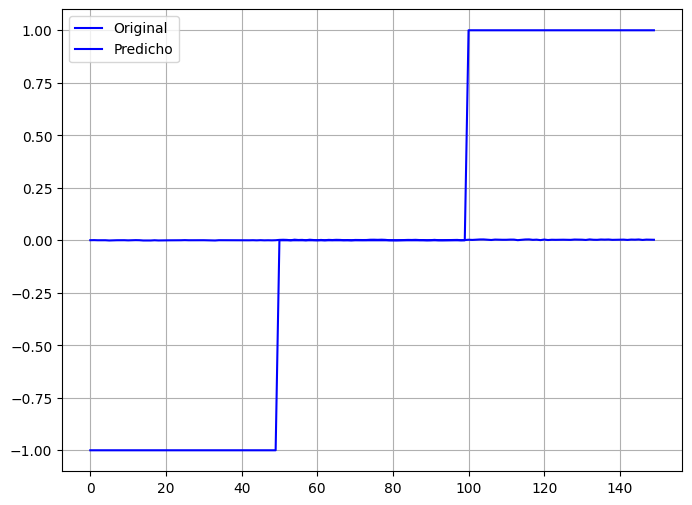

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(y_format, label="Original", color='blue')
plt.plot(output, label="Predicho", color='blue')
plt.grid(True)
plt.legend()
plt.show()